# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga. 

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais. 

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


In [93]:
import pandas as pd
dados = pd.read_excel('Recrutamento.xlsx')
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


**Inferência sobre a base de dados:**

Podemos observar que temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

**Variável Target:** No nosso case a target é a coluna status.

In [94]:
set(dados.status)

{'No', 'Yes'}

Inferência sobre os dados:

Métricas de pontuação sobre ensino:
ssc_p
hsc_p
degree_p
estet_p
mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.



<Axes: >

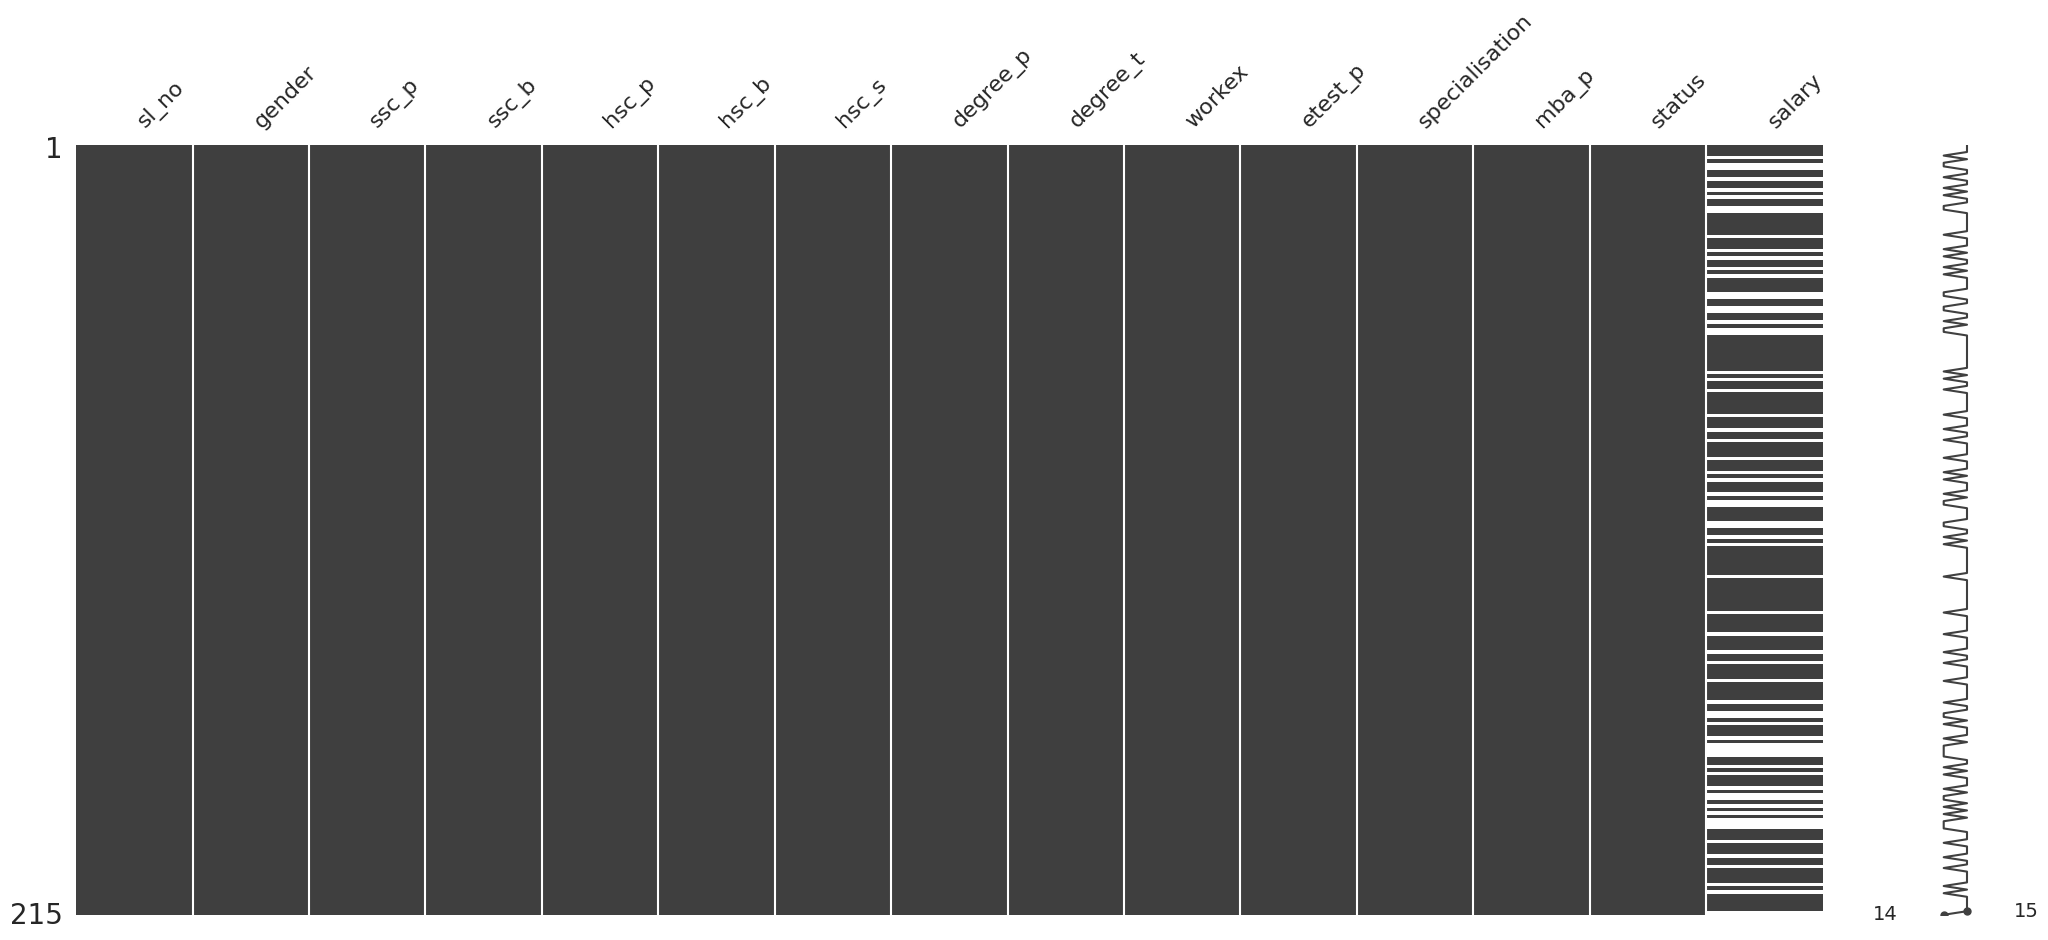

In [95]:
import missingno as msno 
msno.matrix(dados)

In [96]:
dados.isnull().sum() 

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

/tmp/ipykernel_2394979/3902121755.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='status', ylabel='salary'>

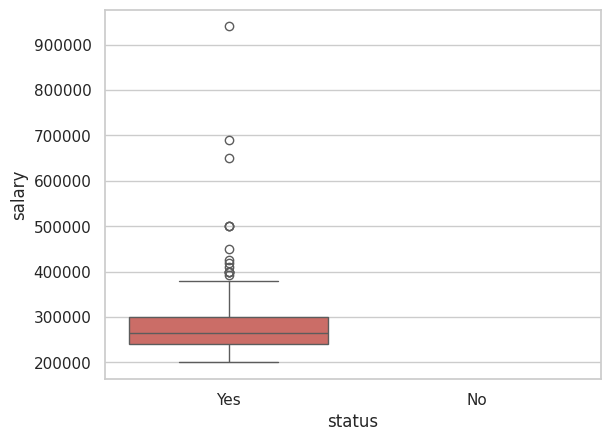

In [97]:
import seaborn as sb
sb.boxplot(x='status', y='salary', data=dados, palette='hls')

In [98]:
dados['salary'].fillna(value=0, inplace=True)
dados.isnull().sum()

/tmp/ipykernel_2394979/3045509609.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

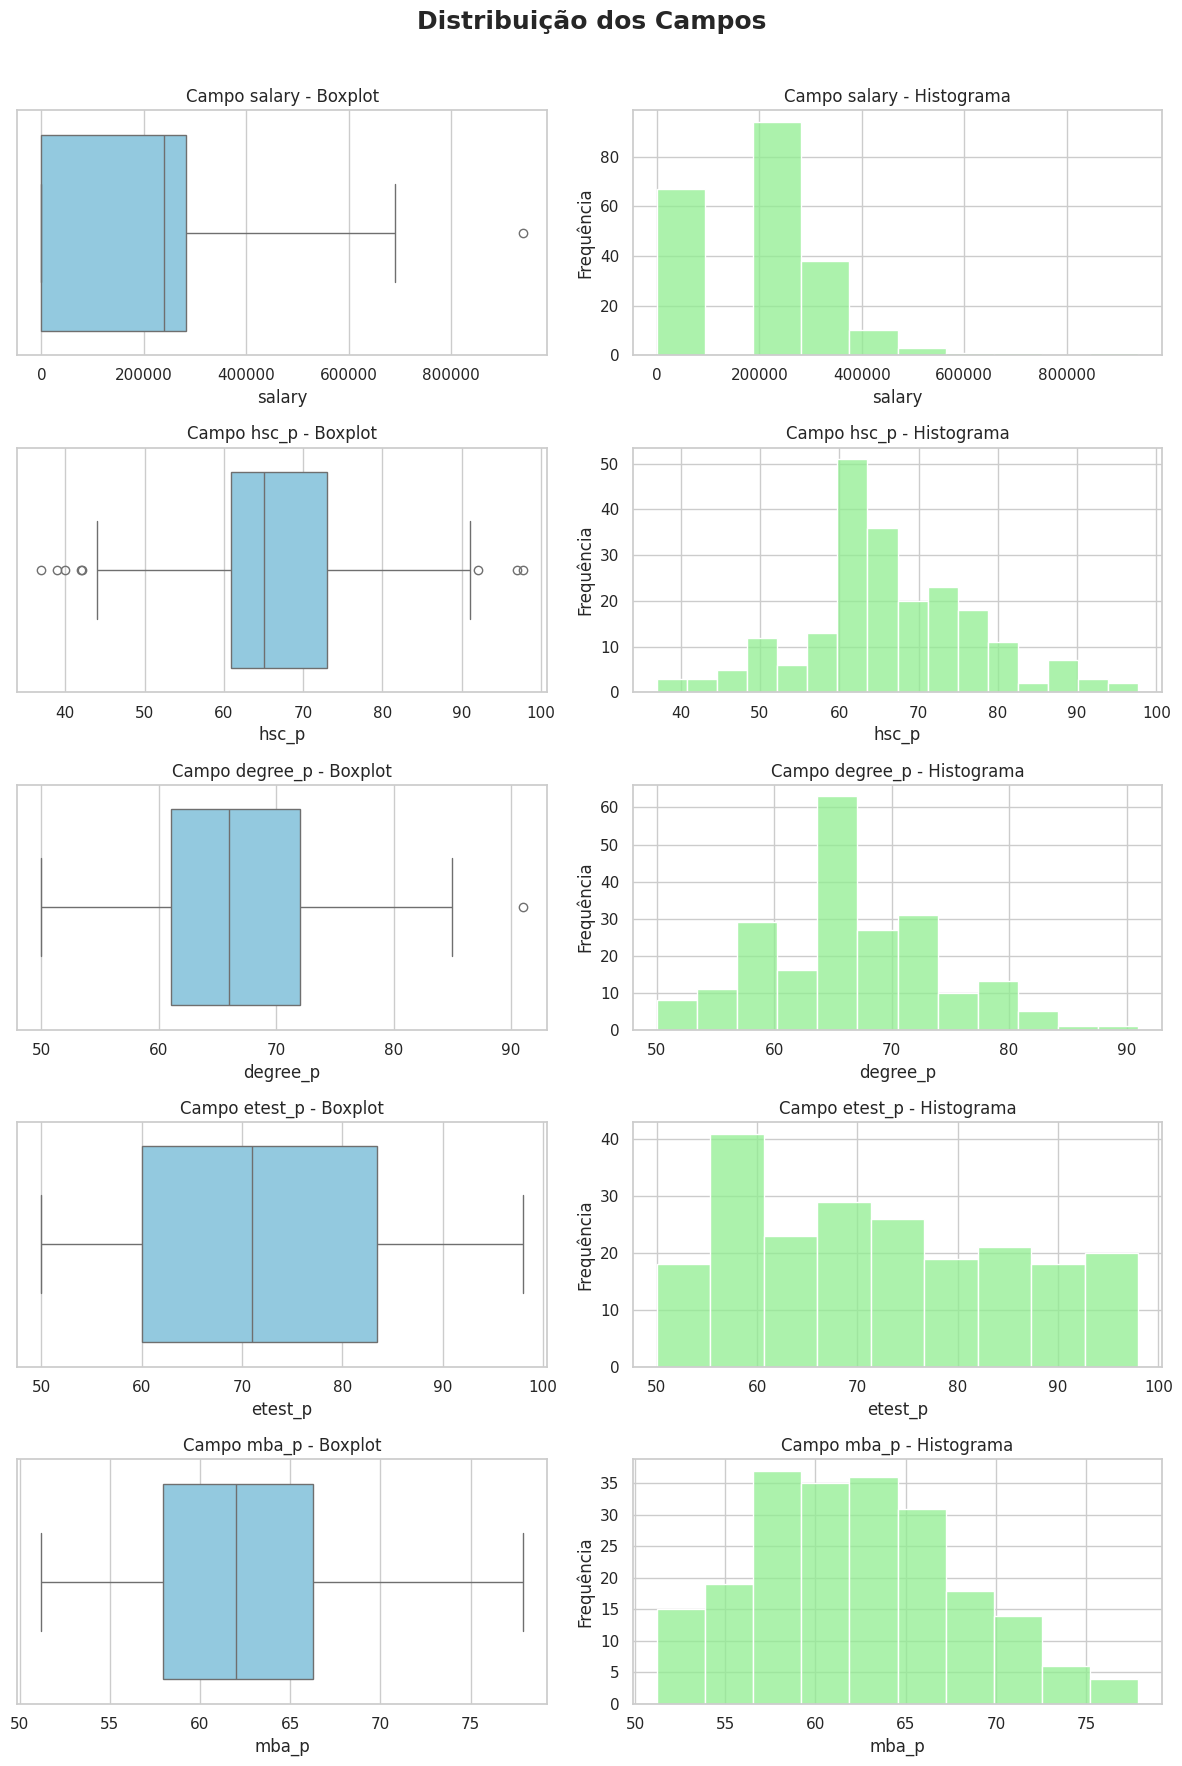

In [99]:
import matplotlib.pyplot as plt
import seaborn as sb

campos = [
    ("salary", ["boxplot", "histplot"]),
    ("hsc_p", ["boxplot", "histplot"]),
    ("degree_p", ["boxplot", "histplot"]),
    ("etest_p", ["boxplot", "histplot"]),
    ("mba_p", ["boxplot", "histplot"]),
]

fig, axs = plt.subplots(len(campos), 2, figsize=(12, 18))
fig.suptitle("Distribuição dos Campos", fontsize=18, weight='bold')

for i, (campo, plots) in enumerate(campos):
    # Boxplot
    sb.boxplot(x=dados[campo], ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f"Campo {campo} - Boxplot")
    axs[i, 0].set_xlabel(campo)
    axs[i, 0].set_ylabel("")

    # Histplot
    sb.histplot(data=dados, x=campo, ax=axs[i, 1], color='lightgreen')
    axs[i, 1].set_title(f"Campo {campo} - Histograma")
    axs[i, 1].set_xlabel(campo)
    axs[i, 1].set_ylabel("Frequência")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

[Text(36.5, 0.5, '')]

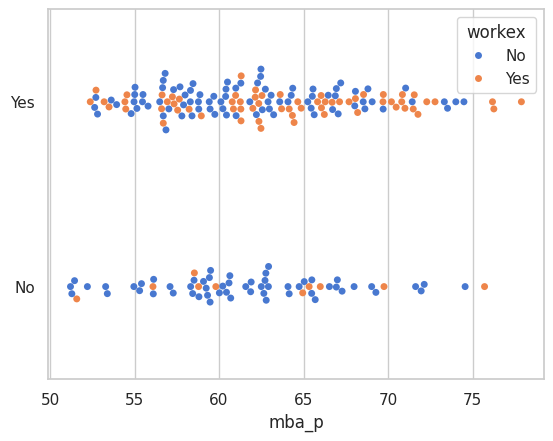

In [100]:
# Será que os scores acadêmicos influenciam na contratação? E a experiência de trabalho?
sb.set_theme(style="whitegrid", palette="muted")

ax = sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel="")

Inferência dos dados:

Podemos observar que a pontuação de MBA pode influência sim na decisão de contratação, temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com esperiência de trabalho. 

In [101]:
#  Existe algum viés de gênero ao oferecer remuneração? 
import plotly_express as px
px.violin(dados,y="salary",x="specialisation",color="gender",box=True,points="all")


Inferência sobre os dados:

Os maiores salários foram dados aos homens.
O salário médio oferecido também foi maior para homens.


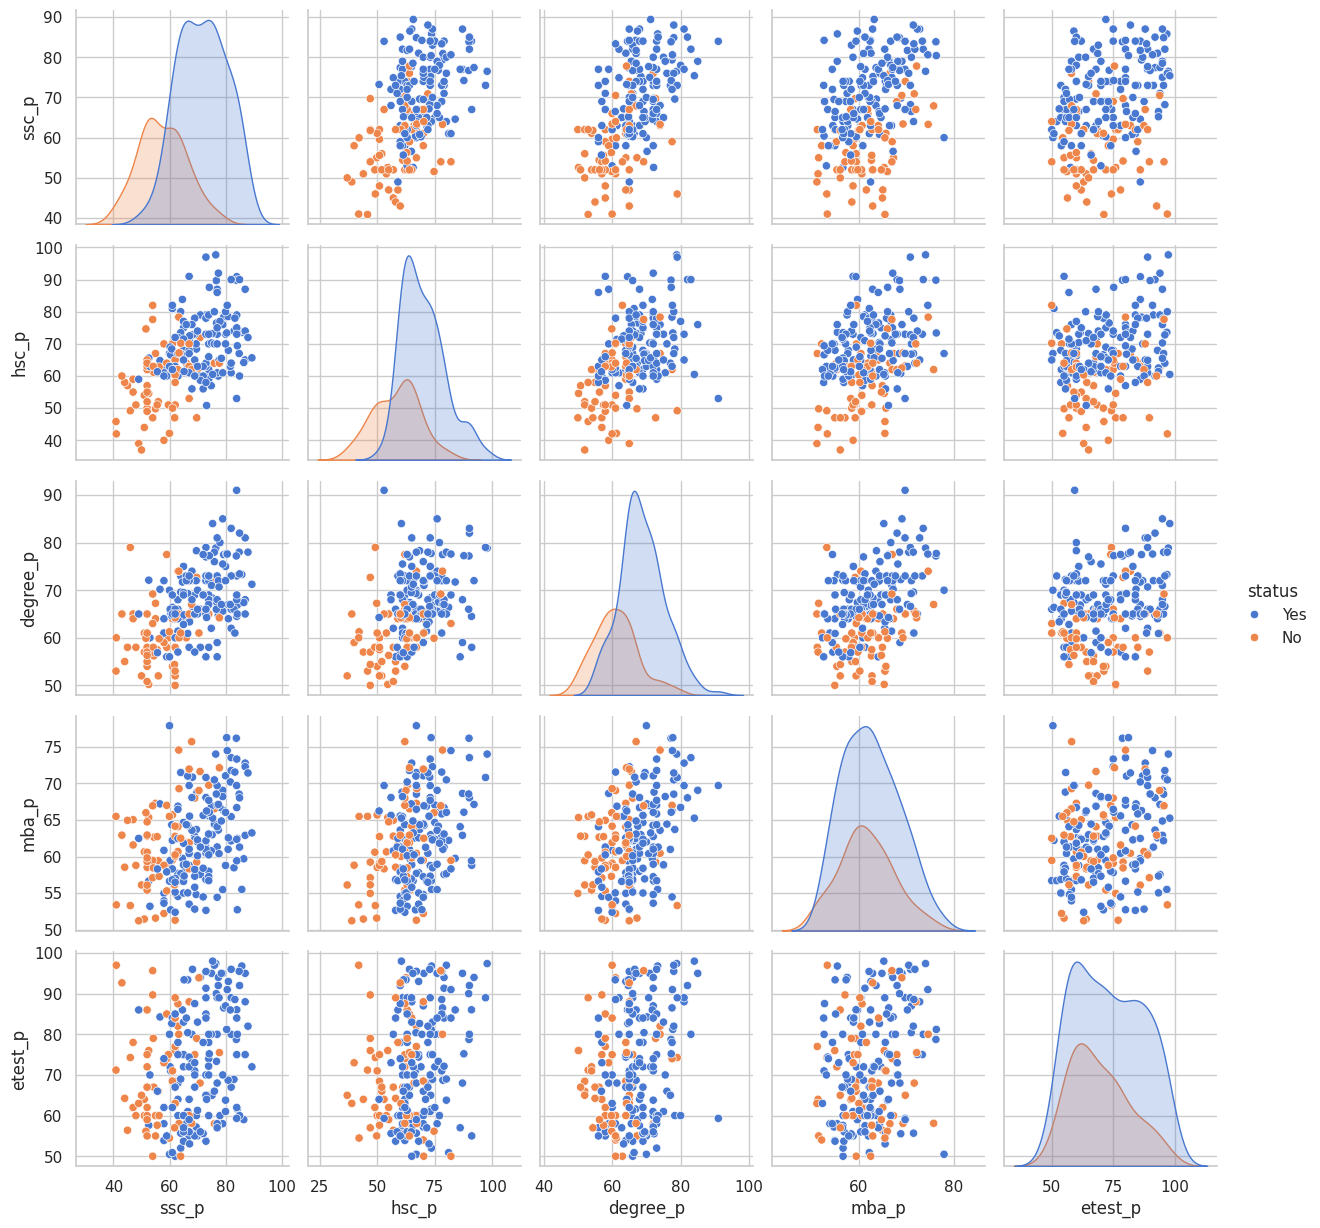

In [102]:
# Vamos analisar a correlação entre as pontuações de desempenho acadêmico com a contratação:
sb.pairplot(dados,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

Inferência sobre os dados:

Candidatos com pontuação alta no ensino médio e na graduação foram contratados.
Quem obteve notas altas em suas escolas foi contratado.

<Axes: >

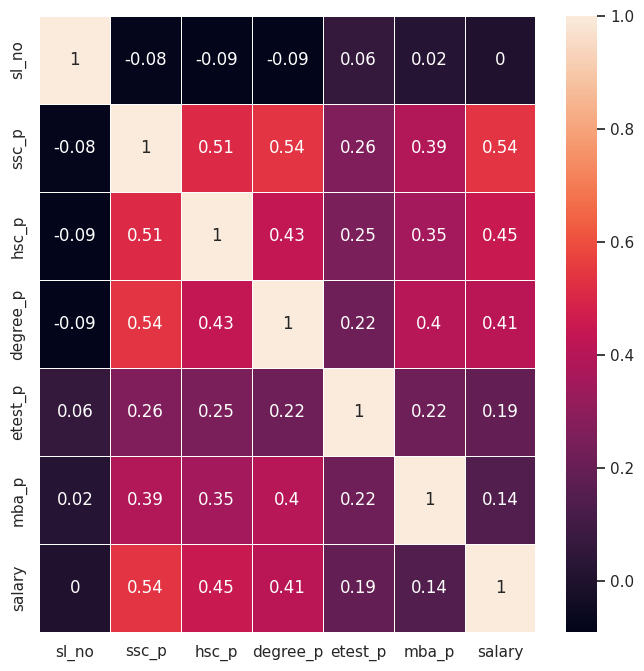

In [103]:
import matplotlib.pyplot as plt

dados_numericos = dados.select_dtypes(include=['number'])
correlation_matrix = dados_numericos.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Aqui somente conseguimos analisar a correlação entre as variáveis numéricas. Será que não seria importante também entender a correlação com as variéveis numéricas?

Vamos aplicar técnicas de transformação nos dados:


Vamos utilizar label enconder para tratar variáveis categoricas que possuem apenas dois tipos de categorias, como genero, especialização e status.

Para as demais categorias, vamos aplicar a tecnica de one hot enconing.

In [104]:
from sklearn.preprocessing import LabelEncoder

colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()
print(colunas_categoricas)

label_encoder = LabelEncoder()
for col in colunas_categoricas:
    dados[col] = label_encoder.fit_transform(dados[col])
dados.head()

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [105]:
dummy_hsc_s=pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_coeded = pd.concat([dados,dummy_hsc_s,dummy_degree_t],axis=1)
dados_coeded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
dados_coeded.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_0,dummy_1,dummy_2,dummy_0,dummy_1,dummy_2
0,1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


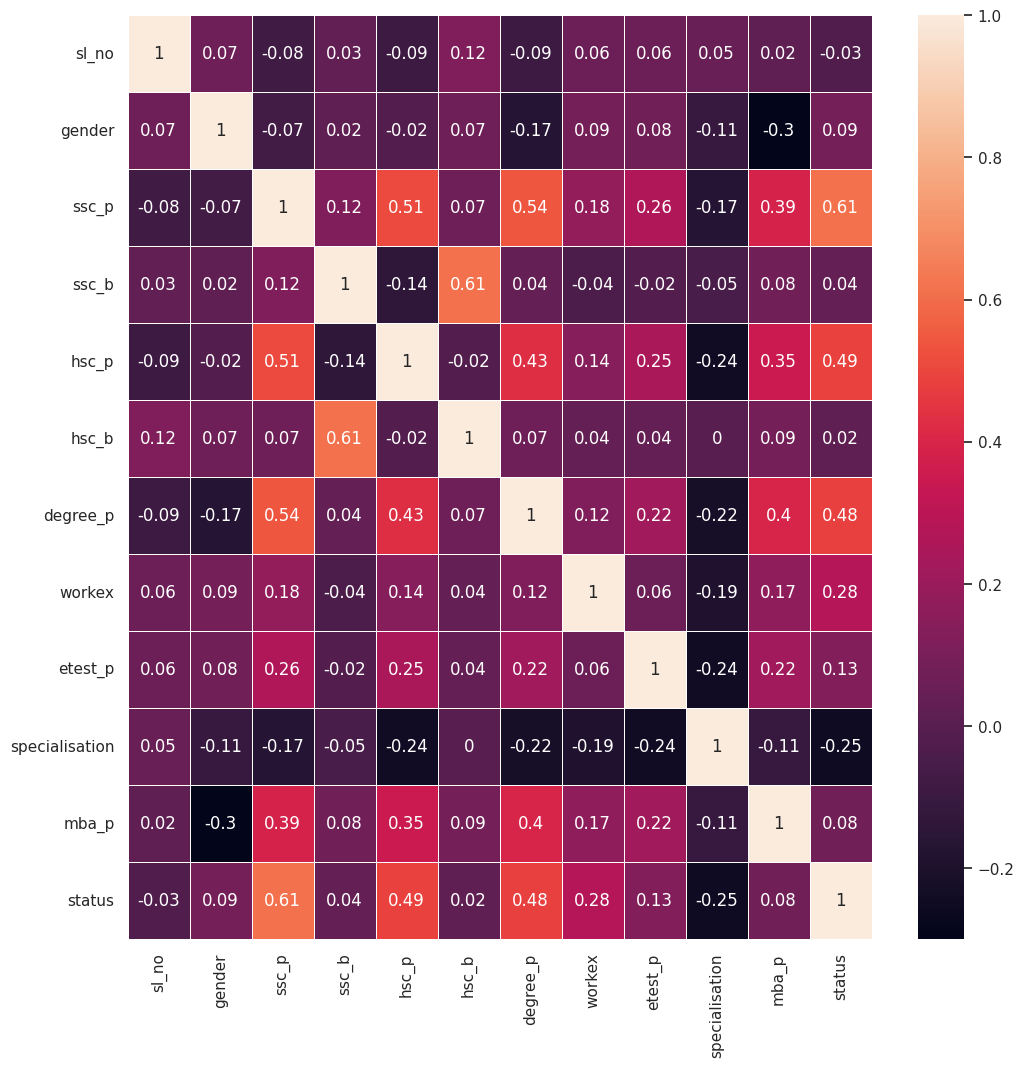

In [106]:
# Seleciona apenas as colunas numéricas para a matriz de correlação
dados_coeded_numerico = dados_coeded.select_dtypes(include=['number'])
correlation_matrix = dados_coeded_numerico.corr().round(2)

import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(12, 12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

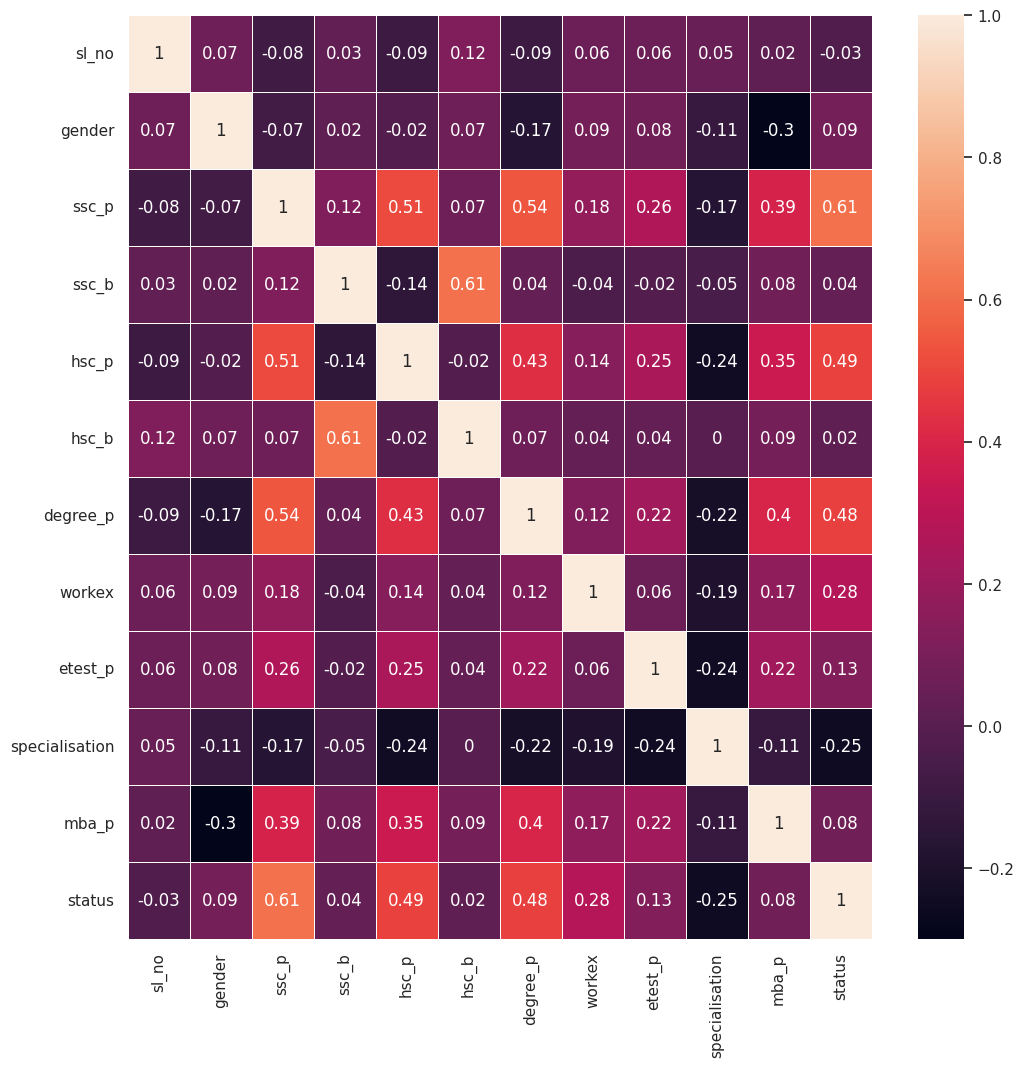

In [107]:
# Seleciona apenas as colunas numéricas para a matriz de correlação
dados_coeded_numerico = dados_coeded.select_dtypes(include=['number'])
correlation_matrix = dados_coeded_numerico.corr().round(2)

import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(12, 12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Agora, conseguimos analisar as correlações!

Analisando a correlação e a análise de dados, podemos considerar algumas variáveis como possíveis fortes features para nosso modelo de classificação!

Mas lembre-se, correlação não é causalidade!

Analisando algumas variáveis e sua correlação com a variável status, podemos identificar que as variáveis workex, degree_p, hsc_p e ssc_p possuem uma correlação interessante na contratação.

A maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

Vamos analisar?


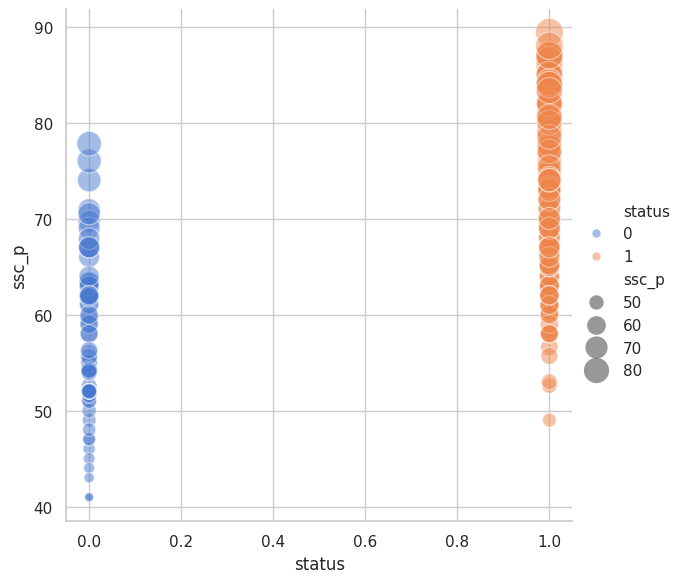

In [108]:
sb.relplot(x="status", y="ssc_p", hue="status", size="ssc_p",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dados_coeded)

In [109]:
from sklearn.model_selection import train_test_split #separação em treino e teste
from sklearn.neighbors import KNeighborsClassifier   #knn
from sklearn.preprocessing import StandardScaler, MinMaxScaler  


x = dados_coeded[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']] #variaveis independentes
y = dados_coeded['status'] #target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) 

scaler = StandardScaler() 
#scaler = MinMaxScaler() 

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test) 

In [110]:
import numpy as np
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_escalonado) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

Text(0, 0.5, 'Mean Error')

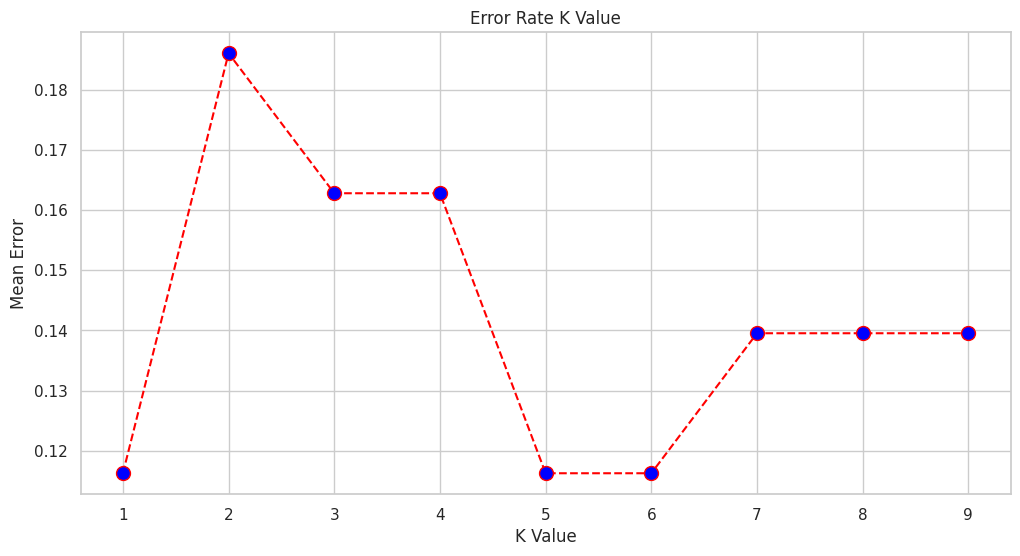

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [112]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train) 

KNeighborsClassifier()

In [113]:
y_predito = modelo_classificador.predict(x_test_escalonado) 
y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [114]:
from sklearn.metrics import accuracy_score
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.8837209302325582


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(x_train_escalonado, y_train) 

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [116]:
y_predito_svm = svm.predict(x_test_escalonado) 
print(accuracy_score(y_test, y_predito_svm)) 

0.8604651162790697


In [117]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
y_prob = modelo_classificador.predict_proba(x_test)[:,1] 

/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [118]:
from sklearn.svm import SVC

poly_svm = Pipeline([
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
svm.fit(x_train, y_train)


Pipeline(steps=[('linear_svc', LinearSVC(C=1))])